<a href="https://colab.research.google.com/github/CillianCritchley/datascience/blob/master/CillianOCriothaile_C00139896_Data_Science_CA3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Introduction

This notebook is a tutorial on data preprocessing and machine learning. The machine learning that it will focus on is linear regression. The data set imported below contains information on university admissions for Masters programs in several Indian universities.
The parameters included are : 1. GRE Scores (aptitude test) ( out of 340 ) 2. TOEFL Scores (english as foreign language) ( out of 120 ) 3. University Rating ( out of 5 ) 4. Statement of Purpose and Letter of Recommendation Strength ( out of 5 ) 5. Undergraduate GPA ( out of 10 ) 6. Research Experience ( either 0 or 1 ) 7. Chance of Admit ( ranging from 0 to 1 ) (Self reported assessment of a particular students chance to be admitted)




In [72]:
from google.colab import files
uploaded = files.upload()


Saving Admission_Predict_Ver1.1.csv to Admission_Predict_Ver1.1 (2).csv


In [0]:
import pandas as pd
import io
dataframe = pd.read_csv(io.BytesIO(uploaded['Admission_Predict_Ver1.1.csv']))

In [74]:
dataframe.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


We can see below that there are 9 columns in total in the dataset and 500 entries. 

The data in the dataset is all numeric which will make preprocessing that much easier as we can be reasonably sure of the datatype in every field. First a quick check for any null or nan values 


In [75]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
Serial No.           500 non-null int64
GRE Score            500 non-null int64
TOEFL Score          500 non-null int64
University Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(4), int64(5)
memory usage: 35.2 KB


In [76]:
dataframe.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In the correlation heatmap below  we can see that GRE, TOEFL and CGPA are all highly correlated with the chance to admit variable.  Already we can see a potentially useful pattern in the data if we are looking to predict university admissions, do well in exams. 

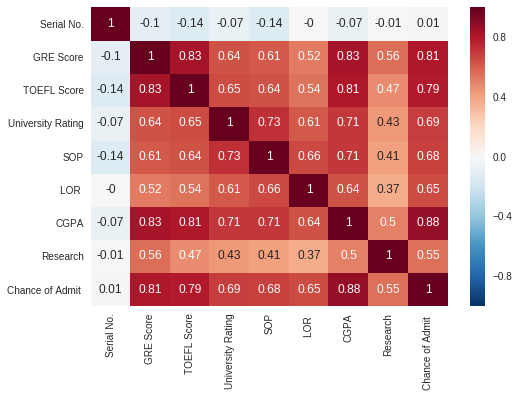

In [77]:
import seaborn
corr = dataframe.corr().round(2)
seaborn.heatmap(data=corr, annot=True)

Here we split the dataset into training sets and test sets. All of the values in the dataframe with the exception of the target variable 'chance to admit' will go into one set, and the target will be on its own in the other set.  We split them into training and test sets because we need to keep some data hidden from the model while it trains and then use it afterwards to test the accuracy of our models predictions. 

In [0]:
names = [x for x in dataframe]
vars= dataframe.drop(names[-1], axis=1, inplace=False)

target = dataframe[names[-1]]




In [83]:
from sklearn.linear_model import LinearRegression

trainX, testX, trainY, testY = train_test_split(vars,target, test_size=.2, random_state=1)

linear = LinearRegression()
linear.fit(trainX,trainY)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Here we are calculating the error in our prediction. We pass in the target variable for the test set as well as the predictions for the test set made with the model we just built.

In [85]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(testY, linear.predict(testX))

0.0411213198043009

We see above that the mean absolute error is 0.04, which is pretty good and tells us that the predictions made with the test set variables match the actual test set target variable within a range of 0.04.